# Revive it
Checking on air quality in Barcelona so we make it a healthier place.

## Dataset
We're using the official data from the city of Barcelona: https://opendata-ajuntament.barcelona.cat/data/en/dataset/qualitat-aire-detall-bcn
As data up to April 2019 is in a different format, we only use data from April 2019 up to the (currently) most recent data: February 2024.

## Check the data and put it in one document

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing stuff

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

2024-04-12 11:14:00.143575: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 11:14:00.331808: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 11:14:01.100761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 11:14:04.708516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
# from revive_it_package.data import detectDelimiter

def detectDelimiter(csv_naam):
    csvFile = f"../raw_data/{csv_naam}"

    with open(csvFile, 'r') as myCsvfile:
        header=myCsvfile.readline()
        if header.find(";")!=-1:
            return ";"
        if header.find(",")!=-1:
            return ","
    #default delimiter (MS Office export)
    return ";"

In [34]:
# Putting data in one excel and saving it for futher use
data = pd.DataFrame()

all_csv = [csv for csv in os.listdir("../raw_data") if csv.endswith(".csv")]

for csv in all_csv:
    print(f"starting {csv}")
    new_df = data

    if detectDelimiter(csv) == ",":
        df = pd.read_csv(f"../raw_data/{csv}")
    else:
        df = pd.read_csv(f"../raw_data/{csv}", delimiter=";")
    data = pd.concat([new_df, df])

data.to_csv("../data/data.csv", index=False)


starting 2022_08_Agost_qualitat_aire_BCN.csv
starting 2023_11_Novembre_qualitat_aire_BCN.csv
starting 2023_12_Desembre_qualitat_aire_BCN.csv
starting 2019_10_Octubre_qualitat_aire_BCN.csv
starting 2023_03_Marc_qualitat_aire_BCN.csv
starting 2019_08_Agost_qualitat_aire_BCN.csv
starting 2023_08_Agost_qualitat_aire_BCN.csv
starting 2023_02_Febrer_qualitat_aire_BCN.csv
starting 2019_06_Juny_qualitat_aire_BCN.csv
starting 2023_10_Octubre_qualitat_aire_BCN.csv
starting 2023_05_Maig_qualitat_aire_BCN.csv
starting 2021_07_Juliol_qualitat_aire_BCN.csv
starting 2021_05_Maig_qualitat_aire_BCN.csv
starting 2021_10_Octubre_qualitat_aire_BCN.csv
starting 2023_04_Abril_qualitat_aire_BCN.csv
starting 2022_11_Novembre_qualitat_aire_BCN.csv
starting 2021_02_Febrer_qualitat_aire_BCN.csv
starting 2023_07_Juliol_qualitat_aire_BCN.csv
starting 2020_02_Febrer_qualitat_aire_BCN.csv
starting 2019_12_Desembre_qualitat_aire_BCN.csv
starting 2021_01_Gener_qualitat_aire_BCN.csv
starting 2021_08_Agost_qualitat_aire

## Upload excel and create df with data we will use
We'll start with one station (50), one contaminant (12) and one station (12)

In [3]:
# Uploaded saved excel with all data
df = pd.read_csv("../data/data.csv")
df.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2022,8,1,1.0,...,2.0,V,2.0,V,1.0,V,2.0,V,1.0,V
1,8,Barcelona,19,Barcelona,4,7,2022,8,2,1.0,...,3.0,V,2.0,V,1.0,V,1.0,V,2.0,V
2,8,Barcelona,19,Barcelona,4,7,2022,8,3,1.0,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,8,Barcelona,19,Barcelona,4,7,2022,8,4,1.0,...,1.0,V,NaN,N,1.0,V,1.0,V,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2022,8,5,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [4]:
# Put column names in lower case
df.columns = [col.lower() for col in df.columns]

# Modify data to timeseries
df.rename(columns={'any' : 'year', 'mes': 'month', 'dia': 'day'}, inplace=True)
df['date'] = pd.to_datetime(df[['year','month','day',]])

# Setting dates as the index
df.set_index(['date'], inplace=True)


In [5]:
df.head()

,codi_provincia,provincia,codi_municipi,municipi,estacio,codi_contaminant,year,month,day,h01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,8,Barcelona,19,Barcelona,4,7,2022,8,1,1.0,...,2.0,V,2.0,V,1.0,V,2.0,V,1.0,V
2022-08-02,8,Barcelona,19,Barcelona,4,7,2022,8,2,1.0,...,3.0,V,2.0,V,1.0,V,1.0,V,2.0,V
2022-08-03,8,Barcelona,19,Barcelona,4,7,2022,8,3,1.0,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
2022-08-04,8,Barcelona,19,Barcelona,4,7,2022,8,4,1.0,...,1.0,V,NaN,N,1.0,V,1.0,V,NaN,N
2022-08-05,8,Barcelona,19,Barcelona,4,7,2022,8,5,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [6]:
# Check for null values to see what is missing apart from some measured data
df.isnull().sum()

codi_provincia          0
provincia               0
codi_municipi           0
municipi                0
estacio                 0
codi_contaminant        0
year                    0
month                   0
day                     0
h01                  3208
v01                     0
h02                  2819
v02                     0
h03                  2477
v03                     0
h04                  2203
v04                     0
h05                  2206
v05                     0
h06                  2214
v06                     0
h07                  2228
v07                     0
h08                  2279
v08                     0
h09                  2500
v09                     0
h10                  3430
v10                     0
h11                  5178
v11                     0
h12                  5488
v12                     0
h13                  5299
v13                     0
h14                  4701
v14                     0
h15                  4051
v15         

In [7]:
# Choose 1 contaminant (NoX)
nox_df = df[df["codi_contaminant"] == 12]

# Check different stations:
nox_df["estacio"].value_counts()

estacio
4     1775
42    1775
44    1775
50    1775
54    1775
57    1775
43    1555
58    1549
Name: count, dtype: int64

In [8]:
# Choose 1 station
nox_4_df = nox_df[nox_df["estacio"] == 50]
nox_4_df

,codi_provincia,provincia,codi_municipi,municipi,estacio,codi_contaminant,year,month,day,h01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,8,Barcelona,19,Barcelona,50,12,2022,8,1,22.0,...,81.0,V,67.0,V,36.0,V,45.0,V,18.0,V
2022-08-02,8,Barcelona,19,Barcelona,50,12,2022,8,2,15.0,...,72.0,V,49.0,V,48.0,V,25.0,V,21.0,V
2022-08-03,8,Barcelona,19,Barcelona,50,12,2022,8,3,18.0,...,51.0,V,41.0,V,46.0,V,26.0,V,25.0,V
2022-08-04,8,Barcelona,19,Barcelona,50,12,2022,8,4,34.0,...,33.0,V,43.0,V,44.0,V,24.0,V,20.0,V
2022-08-05,8,Barcelona,19,Barcelona,50,12,2022,8,5,16.0,...,34.0,V,29.0,V,22.0,V,20.0,V,26.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-26,8,Barcelona,19,Barcelona,50,12,2019,4,26,20.0,...,14.0,V,15.0,V,17.0,V,18.0,V,27.0,V
2019-04-27,8,Barcelona,19,Barcelona,50,12,2019,4,27,29.0,...,45.0,V,34.0,V,27.0,V,17.0,V,15.0,V
2019-04-28,8,Barcelona,19,Barcelona,50,12,2019,4,28,17.0,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N


In [9]:
# Create mini DataFrame
mini_df = nox_4_df['h18']
mini_df = mini_df.sort_index().to_frame(name="NoX")
mini_df

,NoX
date,
2019-04-02,54.0
2019-04-03,50.0
2019-04-04,15.0
2019-04-05,154.0
2019-04-06,26.0
...,...
2024-02-25,29.0
2024-02-26,21.0
2024-02-27,21.0


In [10]:
# Check if df is Timeseries
mini_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1775 entries, 2019-04-02 to 2024-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NoX     1758 non-null   float64
dtypes: float64(1)
memory usage: 27.7 KB


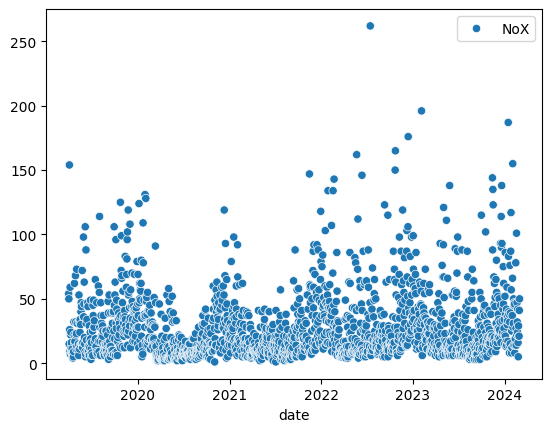

In [11]:
import seaborn as sns

sns.scatterplot(data=mini_df);

## Handle NaN values

In [12]:
# Check NaN values: total and view head
print(len(mini_df[mini_df["NoX"].isna()]))
mini_df[mini_df["NoX"].isna()].head(30)

# -> we have 65 NaN values (if everything stays unchanged: NoX, station 50 and H12)

17


,NoX
date,
2019-04-28,NaN
2019-06-13,NaN
2019-07-05,NaN
2019-07-15,NaN
2019-07-16,NaN
2019-07-21,NaN
2019-08-06,NaN
2019-12-06,NaN
2020-03-25,NaN


### How to handle NA values?
There are no big gaps: the max is 2 days on a row
-> work with a 'Rolling Statistics Imputation' of 5D

In [13]:
mini_df["NoX"] = mini_df["NoX"].fillna(mini_df["NoX"].rolling(5, min_periods=1).mean())
mini_df[mini_df.isna()].head(30)

,NoX
date,
2019-04-02,NaN
2019-04-03,NaN
2019-04-04,NaN
2019-04-05,NaN
2019-04-06,NaN
2019-04-07,NaN
2019-04-08,NaN
2019-04-09,NaN
2019-04-10,NaN


In [14]:
# Check NA values
print(len(mini_df[mini_df["NoX"].isna()]))

# Only first value still NA, hence delete as this won't bring any advantage in keeping
mini_df = mini_df.iloc[1:, :]
print(len(mini_df[mini_df["NoX"].isna()]))

0
0


## Missing Values

When trying to decompose the results we get an error message regarding missing values.

As this are not missing the NA values, most likely this means we have missing periods.

We got indeed a list with missing data which didn't correspond with the NA values:
    
    Observacions importants sobre els històrics:
    
    Degut a incidències tècniques hi ha períodes d'interrupció sense dades i que corresponen a:

    * Del 12 juliol'18 a les 17h fins el 23 de juliol'18 a les 15h
    * Del 23 d'agost'18 a les 16h fins el 24 d'agost'18 a les 9h
    * Del 1/2/2019 al 31/3/2019 degut al canvi de font esmentat.
    * El 20/6/2019 entre les 7:40h i les 14:00h.
    * Del 26/7/2019 a les 13:30h fins el 29/7/2019 a les 10:40h.
    * A l'històric del mes d'abril'20 i en el període 15/4 a 30/4 l'estació amb codi: 54 no té informats els valors dels contaminants de codi : 7,8 i 12 degut a una incidència en la detecció d'aquests .
    * A l'històric del mes de novembre'20 es presenten interrupció de dades els següents dies/hores:
      * El 4 de la 1:50h i les 10:50h
      * El 20 de les 19:50h al 21 a les 11:25h
      * El 27 de les 02:10h al 30 a les 10:05h
    * A l'històric del mes de gener'21 es presenten interrupció dels valors de PM10 a l'estació de Palau Reial del dijous 21 a les 16:00h al dimarts 26 a les 13:00h.

I found that strange at first, but most likely the NA values were invalid sensor data while missing data were totally missing.

Let's check that theory:

In [15]:
mini_df

,NoX
date,
2019-04-03,50.0
2019-04-04,15.0
2019-04-05,154.0
2019-04-06,26.0
2019-04-07,9.0
...,...
2024-02-25,29.0
2024-02-26,21.0
2024-02-27,21.0


In [16]:
# Checking the / for missing values
# Please note: this is a quick overview and not all "dates" are dates (f. ex. 30 feb etc)

missing_data = []

df_copy = mini_df.copy()
for year in df_copy.index.year.unique():
    for month in range(1,13):
        for day in range(1, 32):
            if (((df_copy.index.year == year) & (df_copy.index.month == month) & (df_copy.index.day == day)).sum() == 0):
                missing_data.append(f"{year}-{month}-{day}")

missing_data


['2019-1-1',
 '2019-1-2',
 '2019-1-3',
 '2019-1-4',
 '2019-1-5',
 '2019-1-6',
 '2019-1-7',
 '2019-1-8',
 '2019-1-9',
 '2019-1-10',
 '2019-1-11',
 '2019-1-12',
 '2019-1-13',
 '2019-1-14',
 '2019-1-15',
 '2019-1-16',
 '2019-1-17',
 '2019-1-18',
 '2019-1-19',
 '2019-1-20',
 '2019-1-21',
 '2019-1-22',
 '2019-1-23',
 '2019-1-24',
 '2019-1-25',
 '2019-1-26',
 '2019-1-27',
 '2019-1-28',
 '2019-1-29',
 '2019-1-30',
 '2019-1-31',
 '2019-2-1',
 '2019-2-2',
 '2019-2-3',
 '2019-2-4',
 '2019-2-5',
 '2019-2-6',
 '2019-2-7',
 '2019-2-8',
 '2019-2-9',
 '2019-2-10',
 '2019-2-11',
 '2019-2-12',
 '2019-2-13',
 '2019-2-14',
 '2019-2-15',
 '2019-2-16',
 '2019-2-17',
 '2019-2-18',
 '2019-2-19',
 '2019-2-20',
 '2019-2-21',
 '2019-2-22',
 '2019-2-23',
 '2019-2-24',
 '2019-2-25',
 '2019-2-26',
 '2019-2-27',
 '2019-2-28',
 '2019-2-29',
 '2019-2-30',
 '2019-2-31',
 '2019-3-1',
 '2019-3-2',
 '2019-3-3',
 '2019-3-4',
 '2019-3-5',
 '2019-3-6',
 '2019-3-7',
 '2019-3-8',
 '2019-3-9',
 '2019-3-10',
 '2019-3-11',
 '201

In [17]:
# Let's remove the most obvious mistakes: before and after the data starts

trimmed_data = missing_data[95:146]

# And now we'll delete the non-dates

no_data = ['2-30','2-31', '4-31', '6-31', '9-31', '11-31', '2021-2-29', '2022-2-29', '2023-2-29']
to_del = [s for s in trimmed_data if any(xs in s for xs in no_data)]
len(trimmed_data) - len(to_del)

dates_missing_in_df = list(set(trimmed_data) - set(to_del))

# modify list into datetime

import datetime as dt
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in dates_missing_in_df]
sorted(dates_list)

# Although the format is a bit messed up, we can see that we have maximum 3 missing values in a row.
# Strangly enough, those do not correspond to the list from above.


[datetime.date(2019, 5, 7),
 datetime.date(2019, 5, 8),
 datetime.date(2019, 5, 9),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 31),
 datetime.date(2019, 9, 21),
 datetime.date(2019, 12, 7),
 datetime.date(2019, 12, 8),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 8, 7),
 datetime.date(2020, 8, 8),
 datetime.date(2020, 8, 9),
 datetime.date(2020, 11, 20),
 datetime.date(2020, 11, 28),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 11, 30),
 datetime.date(2021, 11, 8)]

In [18]:
# Add or ignore missing values? Easiest will be to add the missing values, as there are not a lot
# Adding dates:

f = lambda x: x.reindex(pd.date_range(pd.to_datetime('2019-04-04'), pd.to_datetime('2024-02-29')))
full_df = mini_df.apply(f)


In [19]:
# After adding the missing dates, now we have NaN values again:
print(len(full_df[full_df["NoX"].isna()]))
full_df[full_df["NoX"].isna()].head(30)


20


,NoX
2019-05-07,NaN
2019-05-08,NaN
2019-05-09,NaN
2019-07-26,NaN
2019-07-27,NaN
2019-07-28,NaN
2019-07-31,NaN
2019-09-21,NaN
2019-12-07,NaN
2019-12-08,NaN


In [20]:
# As the longest period of NaN is 3 consecutive days, we'll add a rolling fill of 7
full_df["NoX"] = full_df["NoX"].fillna(full_df["NoX"].rolling(7, min_periods=1).mean())

# Check if there are still NaN values
len(full_df[full_df["NoX"].isna()])

0

# Prediction

As our data is now useable, let's start coding and trying to predict the contamination in the future.
Firstly we're going to have a look at our graph:

### Decomposition

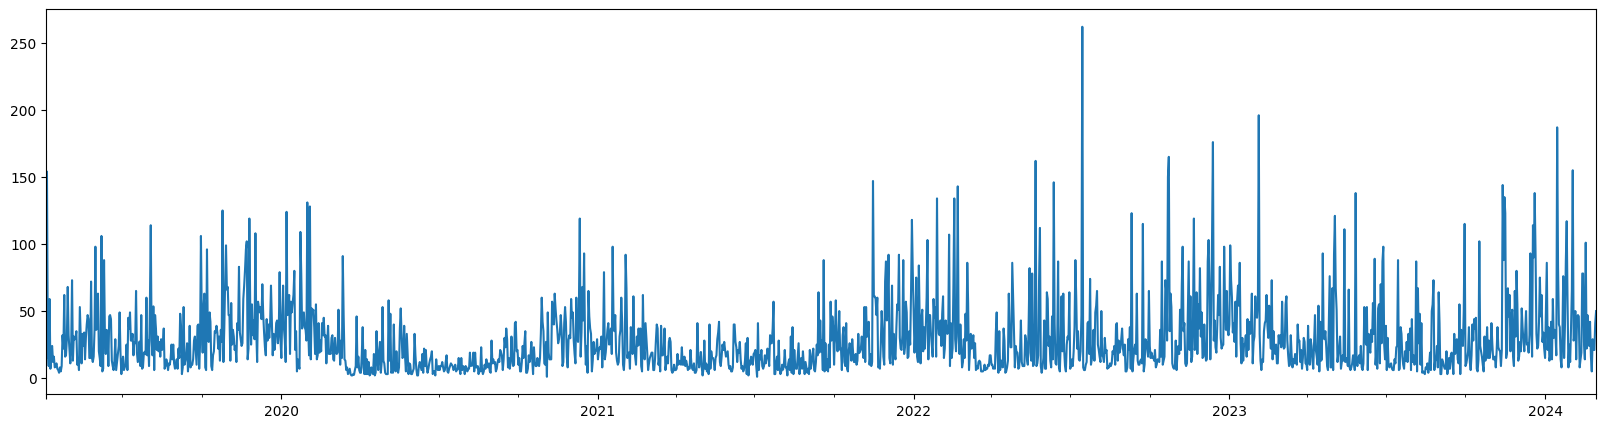

In [21]:
full_df["NoX"].plot(figsize=(20,5));

We can clearly see that there is a kind of trend, where the values are higher around the end-of-year.

Let's try to decompose this and take the trends out in order to be able to predict better:

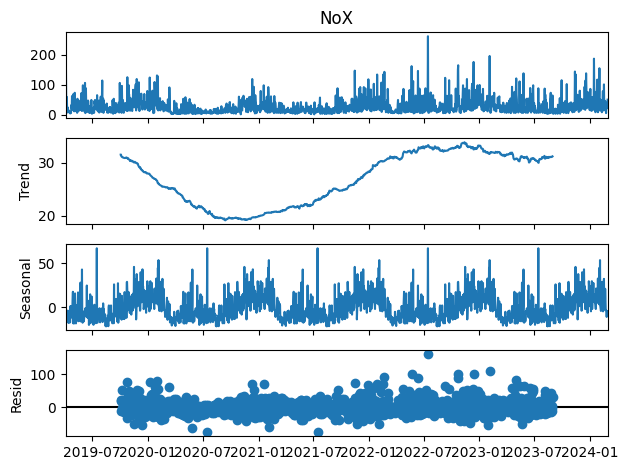

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(full_df["NoX"], model='additive', period = 365)

result_add.plot();

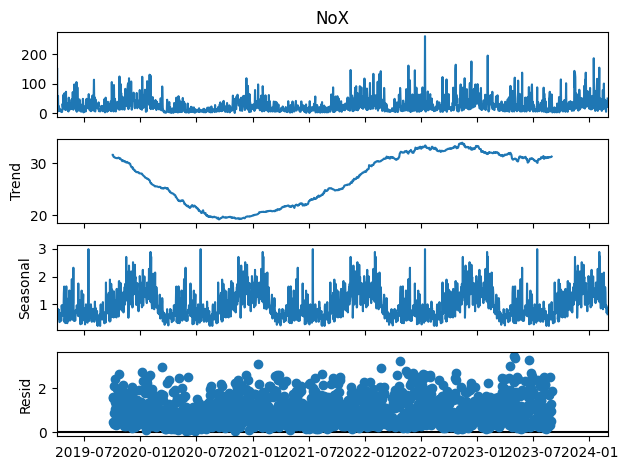

In [52]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(full_df['NoX'], model='multiplicative', period = 365)
result_mul.plot();

First at all it's very clear that we don't have a seasonal trend. There is kind of a yearly trend visible, but it's actually not very clear.

Let's try a rolling mean to smooth the yearly trend and see if we can see more:

In [57]:
# Use rolling mean to smooth our data (decompose uses a filter for trend)
full_df["trend"] = full_df["NoX"].rolling(365).mean()
full_df["trend"].fillna(method='bfill', inplace=True)

# Divide our original 'value' by the monthly mean
full_df["trend_stripped"] = full_df["NoX"] / full_df["trend"]

# Group the remainder by month and take the mean for each month
monthly_means = full_df.groupby(full_df.index.month)[["trend_stripped"]].mean().reset_index()
monthly_means.columns = ["month", "monthly_value"]

# Add these values back onto our original DataFrame
full_df["month"] = full_df.index.month
joined = full_df.reset_index().merge(monthly_means, on = "month")

# Divide our values one more time by our monthly component
joined["residuals"] = joined["trend_stripped"] / joined["monthly_value"]
joined.set_index("index", inplace = True)

/tmp/ipykernel_440010/1091735923.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df["trend"].fillna(method='bfill', inplace=True)
/tmp/ipykernel_440010/1091735923.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_df["trend"].fillna(method='bfill', inplace=True)


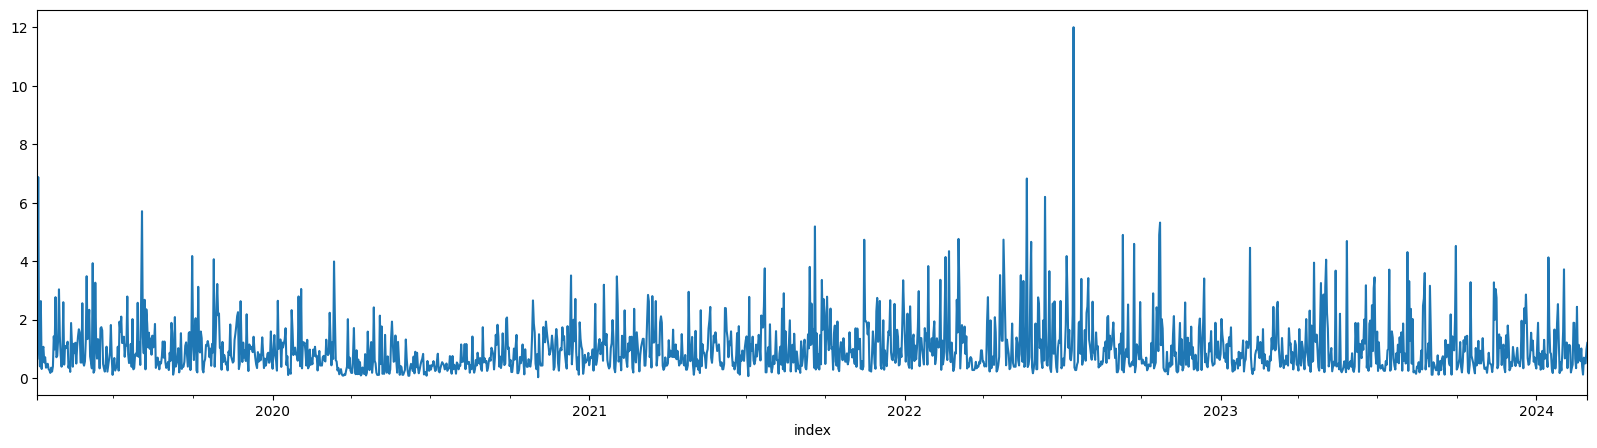

In [54]:
# We can clearly see that the results are better if we took out the yearly trend:
joined["residuals"].plot(figsize=(20,5));

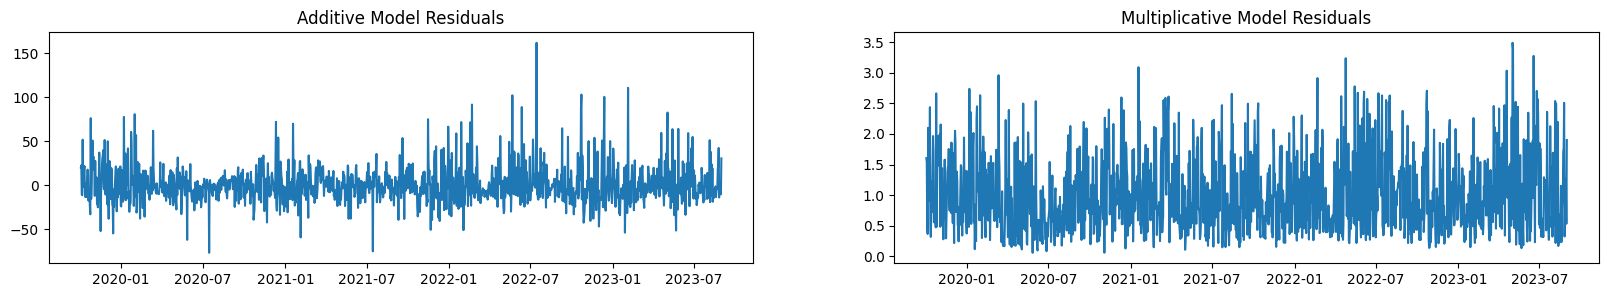

In [58]:
# Plot the residuals with "result_add.resid" to decide which one has the least trend:
# The less notion of time the better. We'll go for the multiplicative model.

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,3))
ax1.plot(result_add.resid); ax1.set_title("Additive Model Residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative Model Residuals");

### Stationarity
Let's check if our data is stationary:

In [59]:
from statsmodels.tsa.stattools import adfuller

# A p-value close to 0 (e.g. p < 0.05) indicates stationarity -> data definitely stationary

adfuller(full_df.NoX)[1]  # p-value

0.00018207089082991656

In [60]:
# When we compare both of above models, we see that both are stationary, but the multiplicative is literaly 0, so the best of the 2.
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  2.667658444583163e-15
multiplicative resid:  6.087450871699479e-09


### Autocorrelation
Now let's have a look at the correlation between the time series and a lagged version of itself: 

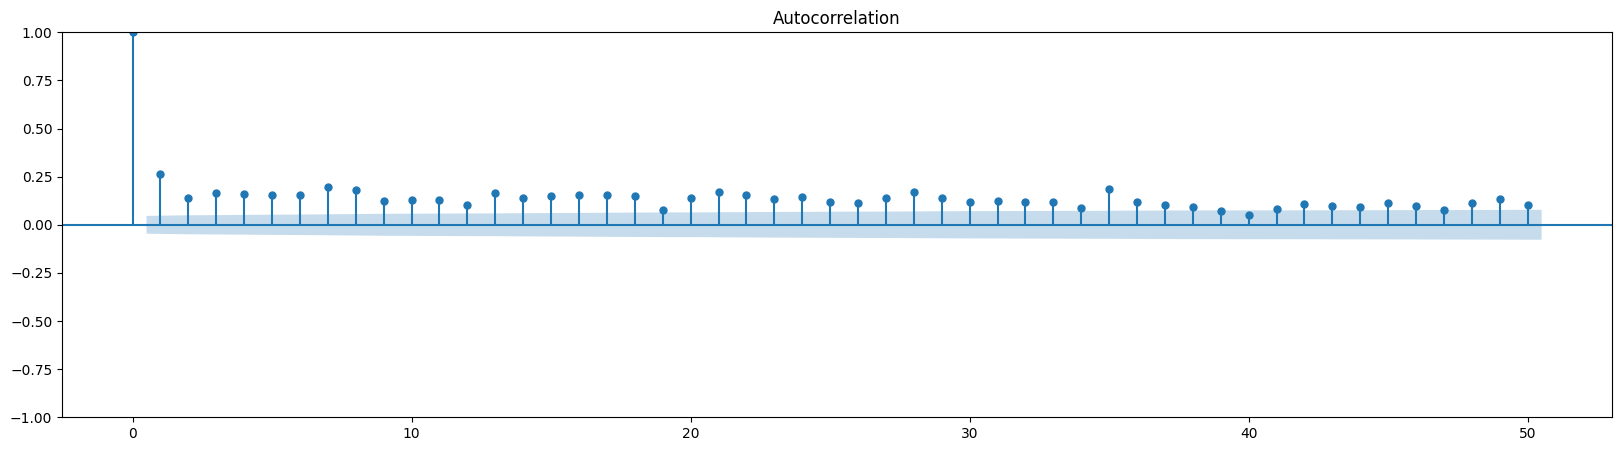

In [61]:
# When we plot the autocorrelation, we see a autocorrelation of al least 18, up to 32, which is the q-value.
# This is the MA (moving average).

fig, ax = plt.subplots(1,1, figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(full_df.NoX, lags=50, ax=ax)
plt.show()

## AR

Now let's try and find the isolated effect of specific time lags:

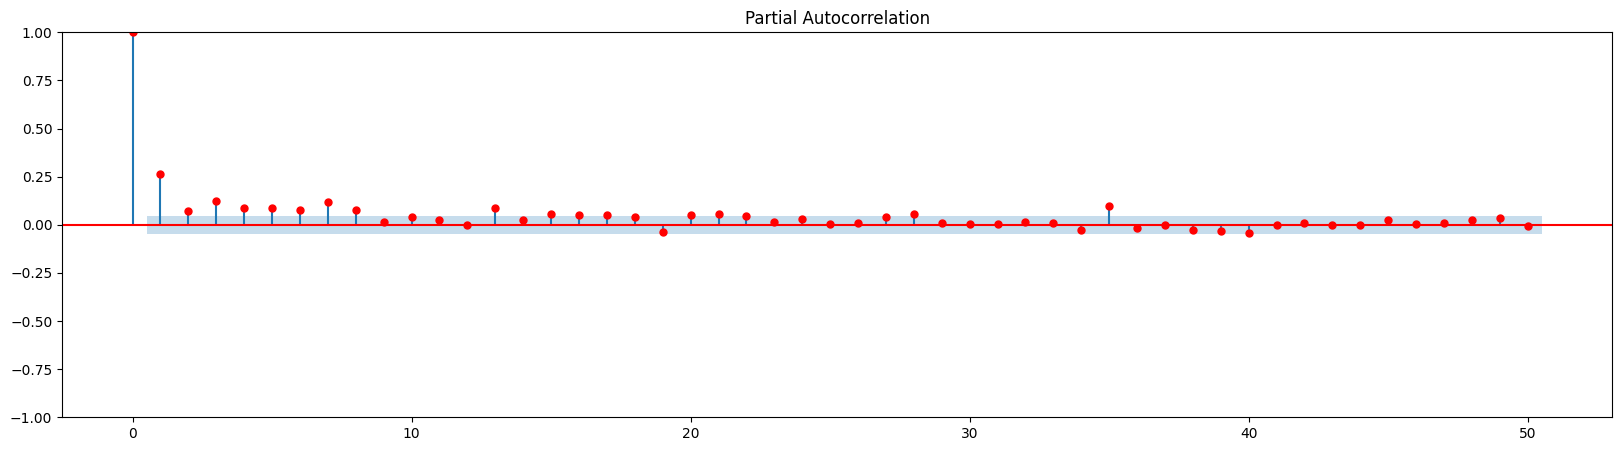

In [62]:
# We can see that we have an PACF of 8, which is the p-value.

fig, ax = plt.subplots(1,1, figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(full_df.NoX, lags=50, c='r', ax=ax)
plt.show();

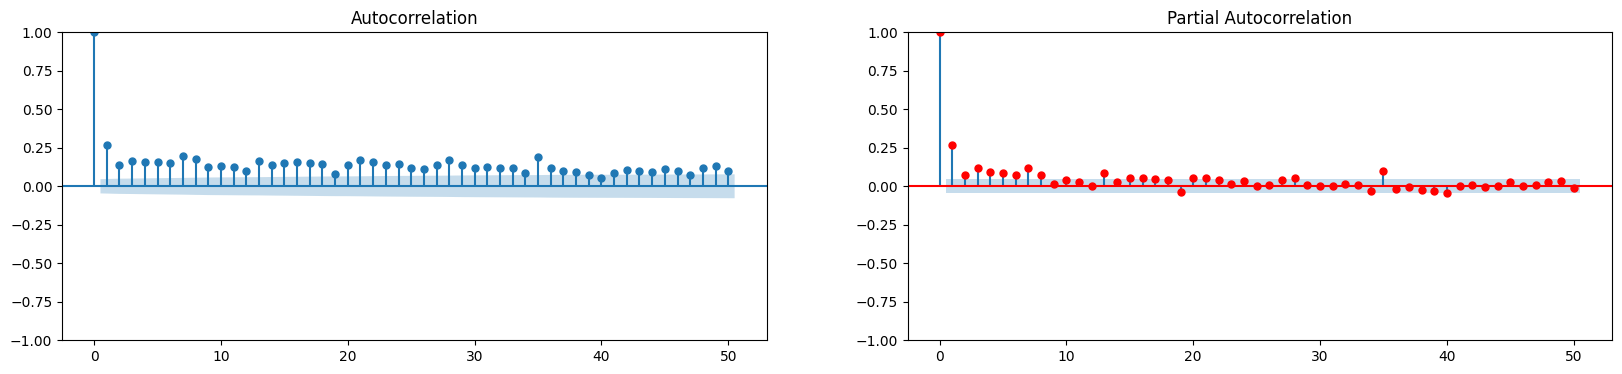

In [63]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

plot_acf(full_df.NoX, lags=50, ax=axes[0]);
plot_pacf(full_df.NoX, lags=50, ax=axes[1], color='r');

## ARIMA

Now it's time to add differencing into our model (the 'I'):

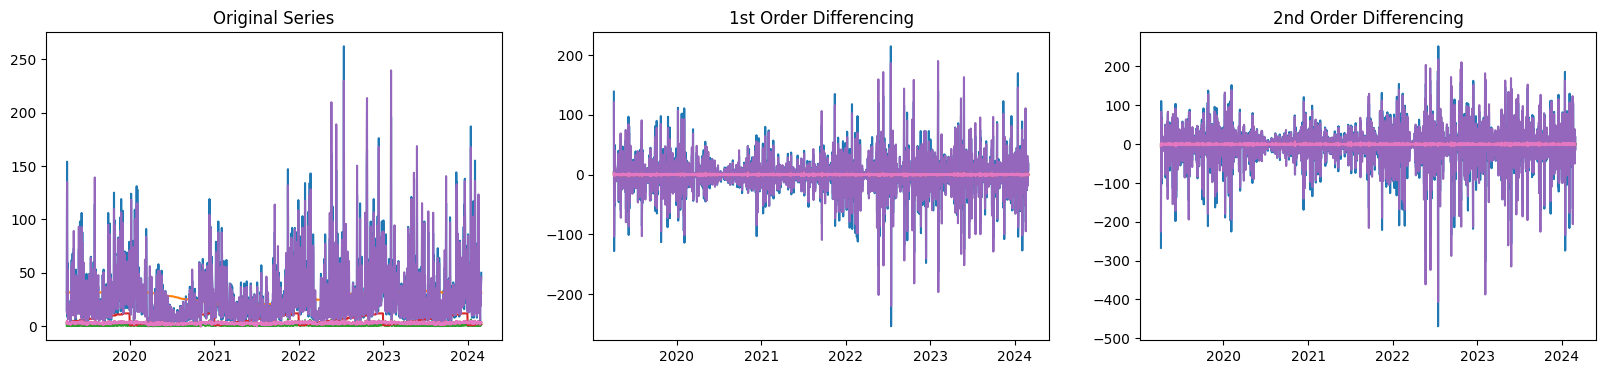

In [64]:
# First let's have a look if we can make the data stationary via differencing.
# After differencing twice, we can still kind of see the year trend into the results:

zero_diff = full_df
first_order_diff = full_df.diff(1)
second_order_diff = full_df.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

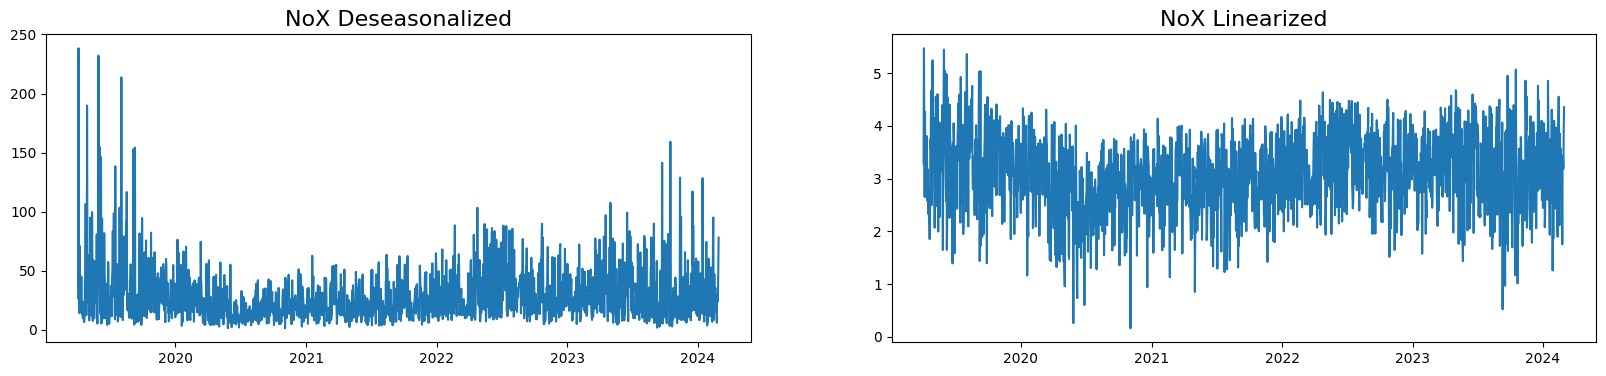

In [65]:
# Let's take out the trends we have:

# Let's remove seasons
full_df['deseasonalized'] = full_df.NoX.values/result_mul.seasonal

plt.figure(figsize=(20,4)); plt.subplot(1,2,1); plt.plot(full_df.deseasonalized);
plt.title('NoX Deseasonalized', fontsize=16);

# Also remove exponential trend
full_df['linearized'] = np.log(full_df['deseasonalized'])

plt.subplot(1,2,2); plt.plot(full_df['linearized'])
plt.title('NoX Linearized', fontsize=16);

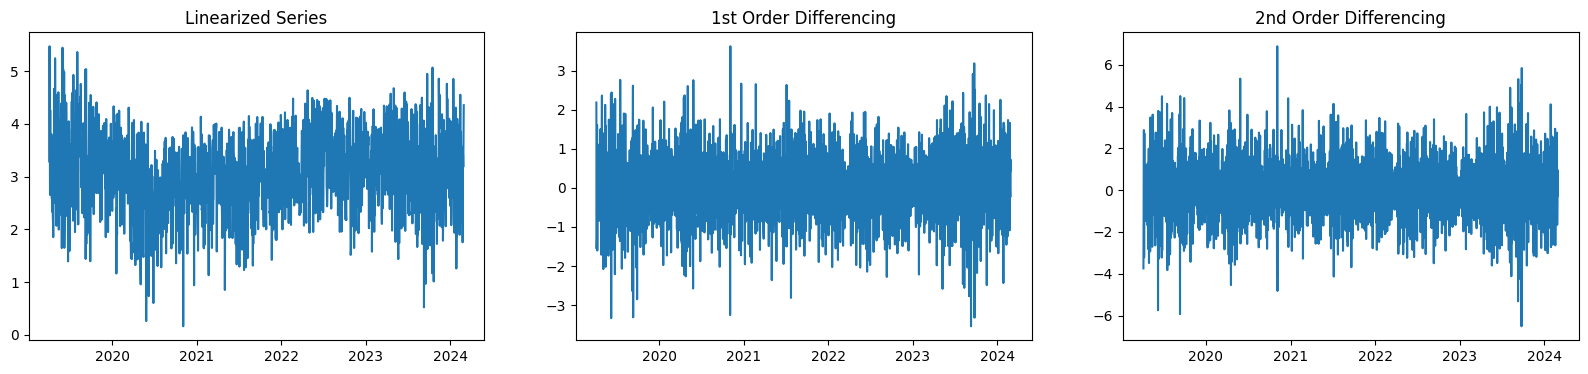

In [66]:
# We can still kind of see the trend (even clearer then before)
# Let's re-run our differencing analysis on this new linearized Time Series and see if we can delete this trend:

# Let's difference this and look at the ACFs
fig, axes = plt.subplots(1, 3,figsize=(20,4))

axes[0].plot(full_df['linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff = full_df['linearized'].diff().dropna()
axes[1].plot(y_diff); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff = full_df['linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff); axes[2].set_title('2nd Order Differencing');

In [67]:
# check with ADF Test for stationarity -> see can see that a diff of 1 is enough.
# So our d = 1

print('p-value zero-diff: ', adfuller(full_df['linearized'])[1])
print('p-value first-diff: ', adfuller(full_df['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(full_df['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  7.692398796294223e-06
p-value first-diff:  1.2016441841844023e-26
p-value second-diff:  4.191046316707809e-30


In [68]:
# automatically estimate differencing term so we don't need to visualise this:

import pmdarima
from pmdarima.arima.utils import ndiffs
ndiffs(full_df['linearized'])

1

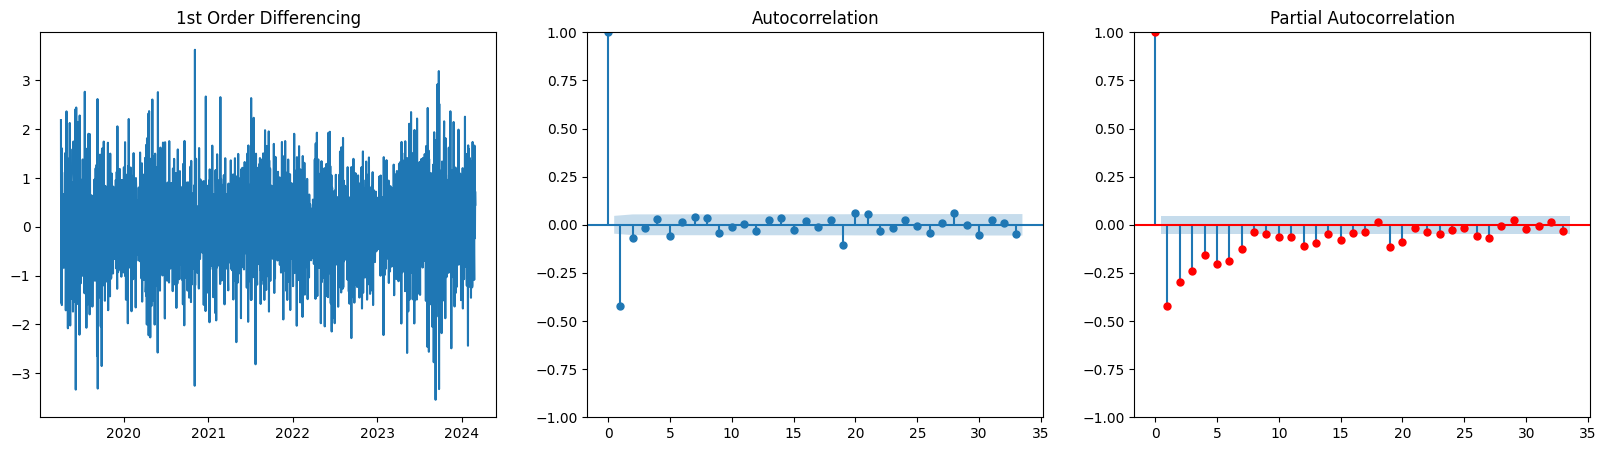

In [71]:
# Let's repeat the results that we got:
# d = 1, q = 1 and p = 7

# ACF / PACF analysis of y_diff linearized
fig, axes = plt.subplots(1,3, figsize=(20,5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

In [72]:
# Let's check our results with the Box-Jenkins method:

from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(full_df['linearized'], order=(7, 1, 1), trend='t')
arima = arima.fit()

/home/wouter/.pyenv/versions/3.10.6/envs/revive-it/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                 1793
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -1941.906
Date:                Fri, 12 Apr 2024   AIC                           3903.813
Time:                        11:36:25   BIC                           3958.724
Sample:                    04-04-2019   HQIC                          3924.087
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.036e-05      0.000     -0.186      0.853      -0.001       0.001
ar.L1          0.1366      0.023      5.834      0.000       0.091       0.182
ar.L2          0.0032      0.024      0.135      0.893      -0.043       0.049
ar.L3         -0.0178      0.024     -0.729      0.466      -0.066       0.030
ar.L4          0.0207      0.024      0.866      0.386      -0.026       0.068
ar.L5         -0.0413      0.024     -1.699      0.089      -0.089       0.006
ar.L6          0.0295      0.024      1.240      0.215      -0.017       0.076
ar.L7          0.0735      0.022      3.283      0.001       0.030       0.117
ma.L1         -0.9791      0.006   -167.349      0.000      -0.991      -0.968
sigma2         0.5127      0.018     28.789      0.000       0.478       0.548
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                34.71
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.34
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
import pmdarima as pm
smodel = pm.auto_arima(full_df['linearized'],
                       start_p=1, max_p=7,
                       start_q=1, max_q=1,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4089.287, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4860.536, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4512.100, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4176.772, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4860.536, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4086.172, Time=1.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4346.940, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4180.520, Time=0.85 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4243.067, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4086.172, Time=1.50 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 7.959 seconds


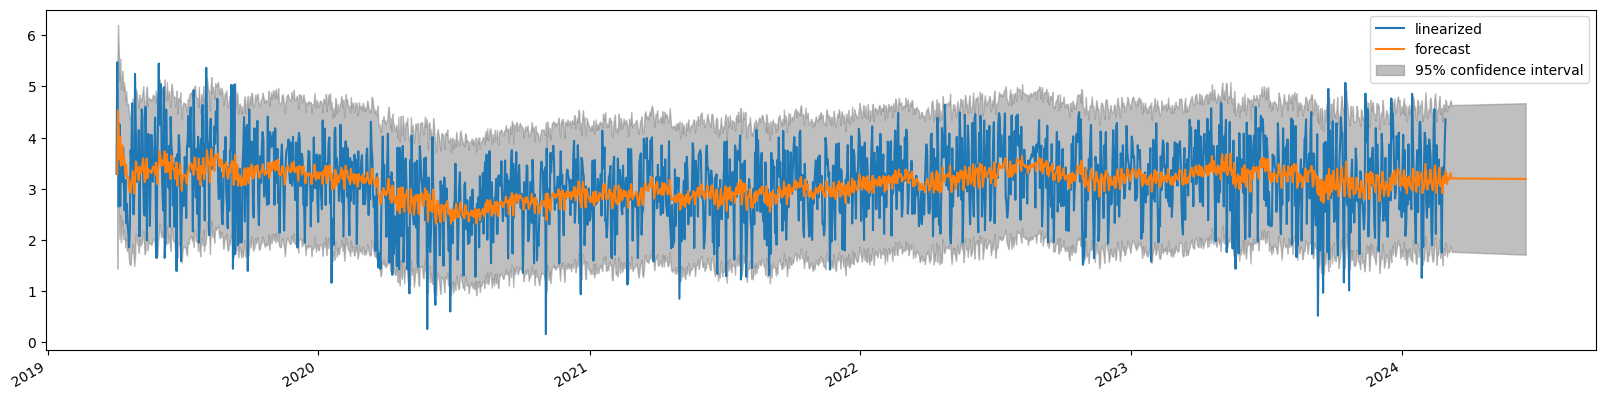

In [76]:
# Let's check our predictions:

from statsmodels.graphics.tsaplots import plot_predict

fig, axs = plt.subplots(1, 1, figsize=(20, 5))
axs.plot(full_df['linearized'], label='linearized')
plot_predict(arima, start=1, end=1900, ax=axs);

In [77]:
# Create a correct train_test_split to predict the last +/- 450 points
train = full_df['linearized'][0:1350]
test = full_df['linearized'][1350:]

# Build model
arima = ARIMA(train, order=(2, 1, 1), trend='t')
arima = arima.fit()

## Forecast
# Forecast values
forecast = arima.forecast(len(test), alpha=0.05)  # 95% confidence

# Forecast values and confidence intervals
forecast_results = arima.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/home/wouter/.pyenv/versions/3.10.6/envs/revive-it/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [78]:
# We define here a "Plot forecast vs. real", which also shows historical training set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(20,5), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

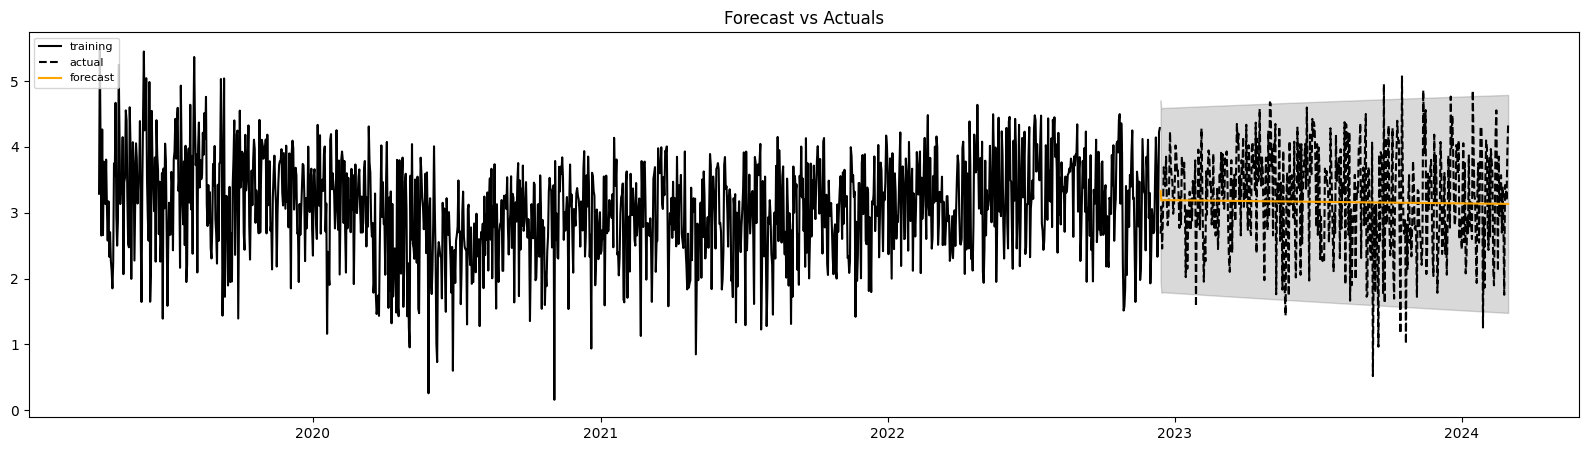

In [79]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

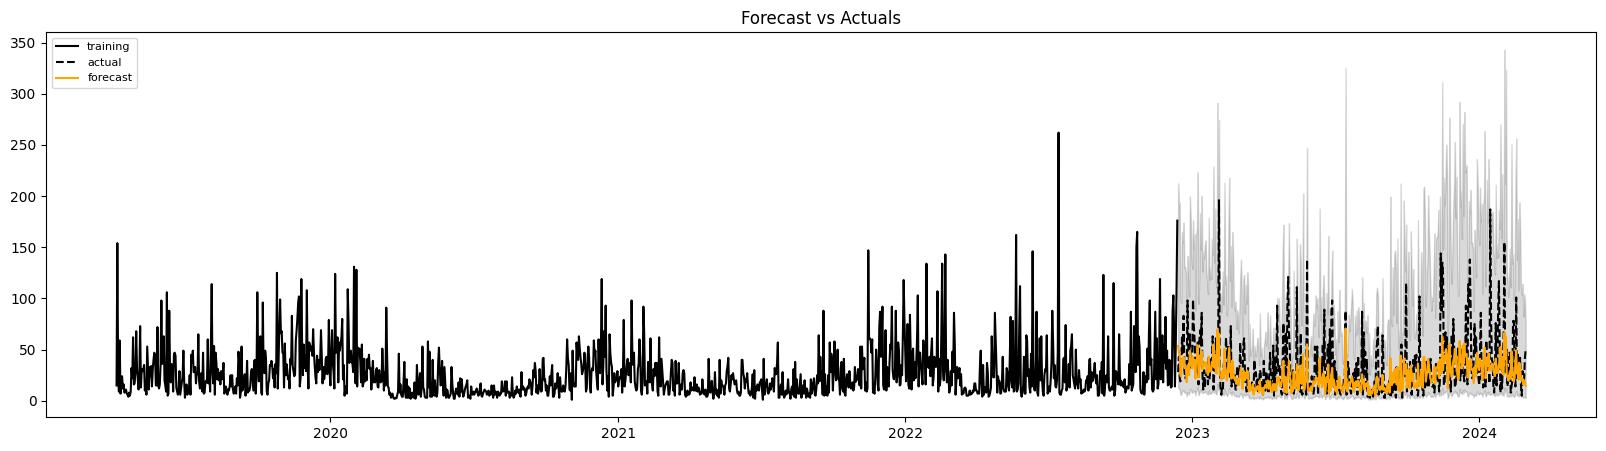

In [80]:
# Well, this wasn't our original dataset, but our dataset without the seasonal and exponential components.
# Let's add them back in!

# Re-compose back to initial TS

forecast_recons = np.exp(forecast) * result_mul.seasonal[1350:]
train_recons = np.exp(train) * result_mul.seasonal[0:1350]
test_recons = np.exp(test) * result_mul.seasonal[1350:]
lower_recons = np.exp(confidence_int)[:, 0] * result_mul.seasonal[1350:]
upper_recons = np.exp(confidence_int)[:, 1] * result_mul.seasonal[1350:]

# Plot
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons.values, upper_recons.values)

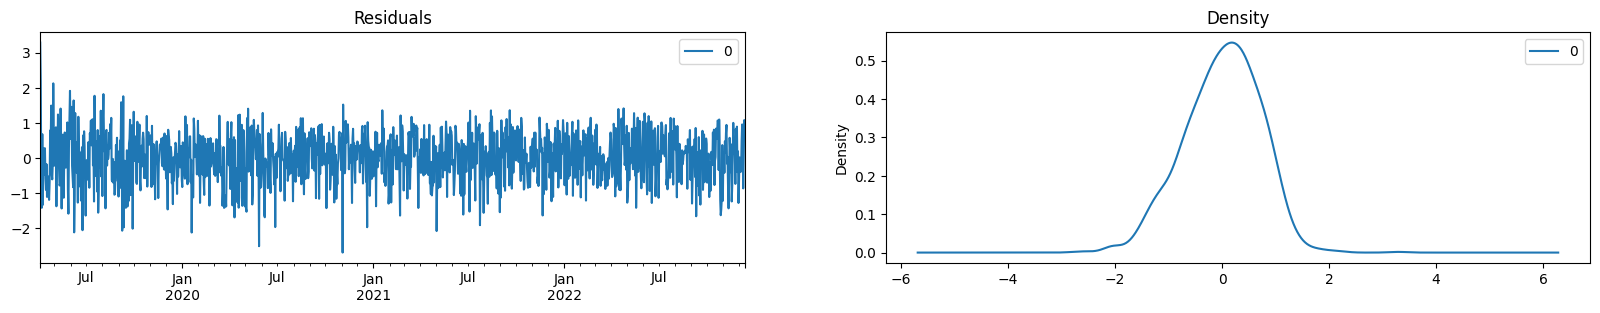

In [81]:
# Check residuals for inference validity
# Residuals of equal variance over time (i.e. homoskedastic) & Approximately normally distributed
# Results can be trusted

residuals = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(20,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);

## SARIMA

Removes the need to de-seasonalize our data

Let's plot our original Time Series one more time:

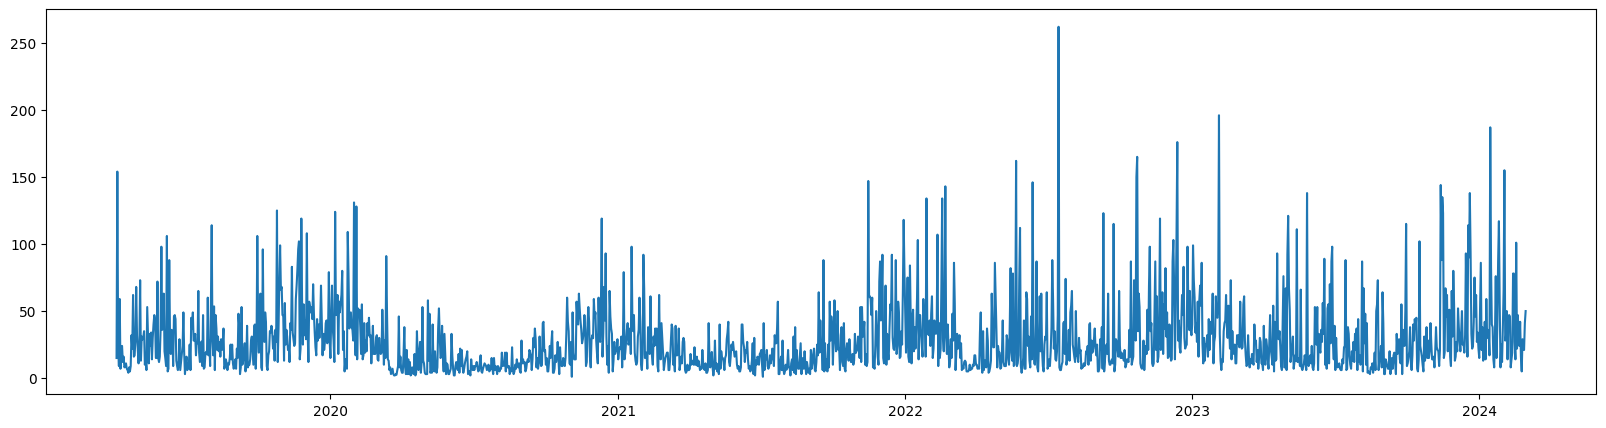

In [82]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))

axs.plot(full_df.NoX);


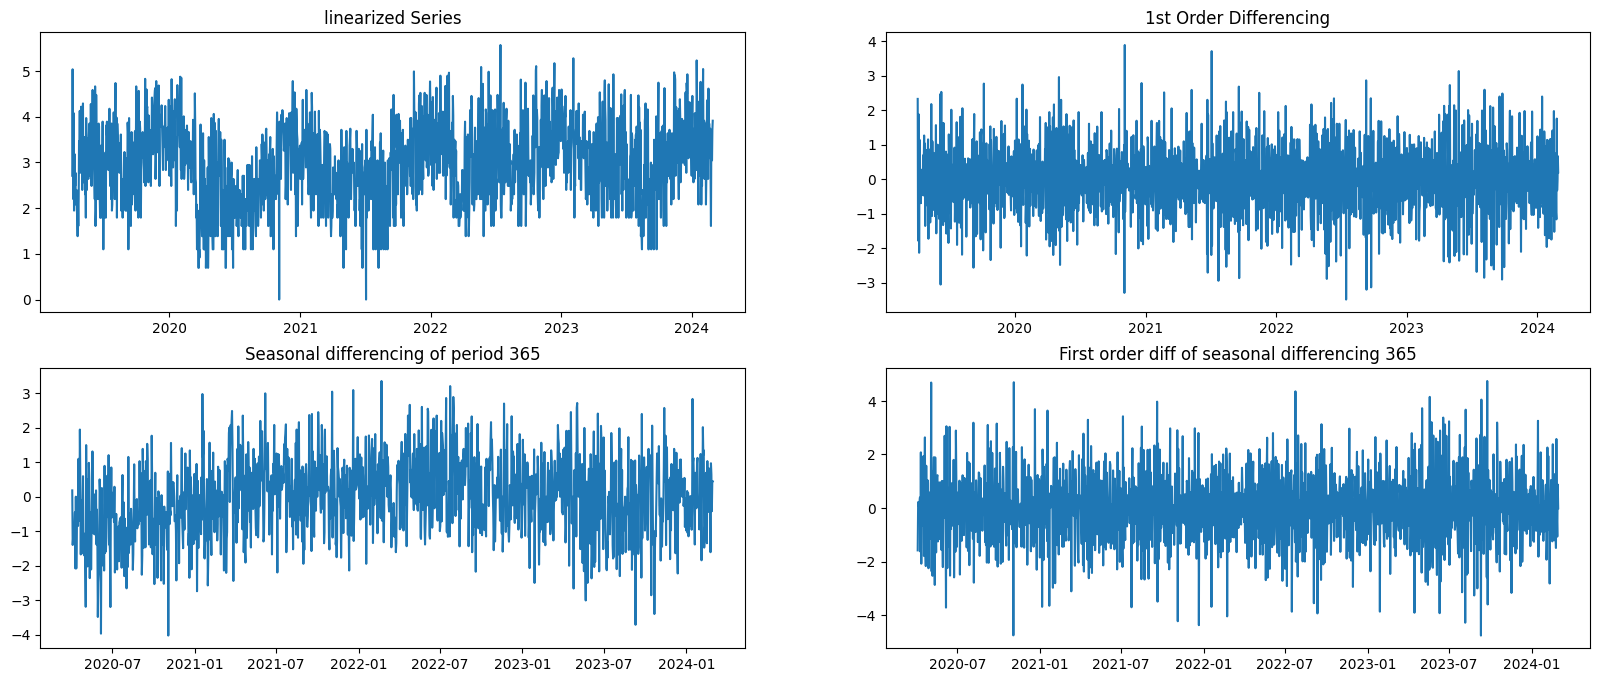

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(20,8))
# keeping just log transform to stay ~ linear
full_df['log'] = np.log(full_df.NoX)

# linearized series
axs[0,0].plot(full_df.log); axs[0,0].set_title('linearized Series')

# Normal differencing
axs[0,1].plot(full_df.log.diff(1)); axs[0,1].set_title('1st Order Differencing')

# Seasonal differencing
axs[1,0].plot(full_df.log.diff(365))
axs[1,0].set_title('Seasonal differencing of period 365')

# Sesonal + Normal differencing
axs[1,1].plot(full_df.log.diff(365).diff(1))
axs[1,1].set_title('First order diff of seasonal differencing 365');

In [84]:
# Create a correct Training/Test split to predict the last 1350 points
train = full_df.log[0:1350]
test = full_df.log[1350:]

In [85]:
# Let's check for the best Sarima model.
# This were our previous values: # d = 1, q = 1 and p = 8

smodel = pm.auto_arima(train, seasonal=True, m=365,
                       start_p=6, max_p=8, max_d=1, start_q=0, max_q=1,
                       start_P=6, max_P=8, max_D=2, start_Q=0, max_Q=2,
                       trace=True, error_action='ignore', suppress_warnings=True)

# Best model:  ARIMA(1,1,1)(2,0,1)[12]

Performing stepwise search to minimize aic


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build Model
sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(2, 0, 1, 365))
sarima = sarima.fit(maxiter=75)

# Forecast
results = sarima.get_forecast(len(test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17670D+00    |proj g|=  1.17295D-01


 This problem is unconstrained.



At iterate    5    f=  1.15220D+00    |proj g|=  3.83391D-02

At iterate   10    f=  1.14636D+00    |proj g|=  3.57855D-04

At iterate   15    f=  1.14632D+00    |proj g|=  7.55011D-03

At iterate   20    f=  1.14470D+00    |proj g|=  5.16081D-03

At iterate   25    f=  1.14461D+00    |proj g|=  2.14268D-03

At iterate   30    f=  1.14457D+00    |proj g|=  3.86414D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     41      1     0     0   3.864D-05   1.145D+00
  F =   1.1445660286138706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/wouter/.pyenv/versions/3.10.6/envs/revive-it/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


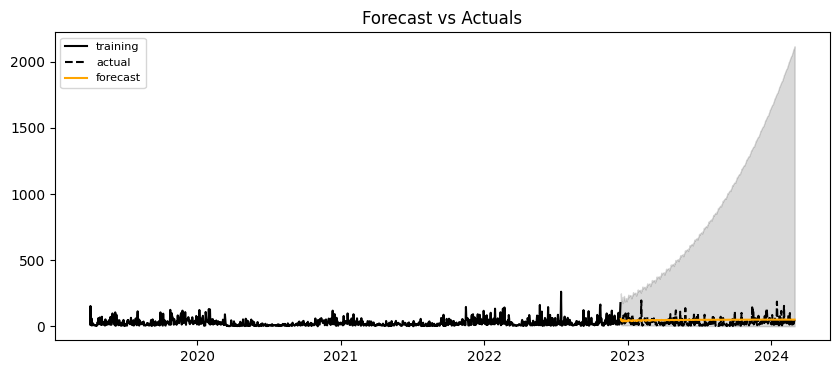

In [57]:
# Reconstruct by taking exponential
forecast_recons = pd.Series(np.exp(forecast), index=test.index)
lower_recons = np.exp(confidence_int['lower log']).values
upper_recons = np.exp(confidence_int['upper log']).values

plot_forecast(forecast_recons, np.exp(train), np.exp(test), upper = upper_recons, lower=lower_recons)

In [58]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                log   No. Observations:                 1350
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -1545.164
Date:                            Thu, 11 Apr 2024   AIC                           3102.328
Time:                                    14:15:11   BIC                           3133.571
Sample:                                04-04-2019   HQIC                          3114.029
                                     - 12-13-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1376      0.028      4.878      0.000       0.082       0.193
ma.L1         -0.9192      0.012    -75.234      0.000      -0.943      -0.895
ar.S.L12       0.8020      0.101      7.935      0.000       0.604       1.000
ar.S.L24       0.0926      0.029      3.244      0.001       0.037       0.149
ma.S.L12      -0.8699      0.099     -8.773      0.000      -1.064      -0.676
sigma2         0.5778      0.023     25.144      0.000       0.533       0.623
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.90   Prob(JB):                         0.93
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""